# Setup

In [7]:
import tsvopener
import pandas as pd
import numpy as np
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix, vstack
from sklearn.semi_supervised import LabelPropagation, LabelSpreading




regex_categorized = tsvopener.open_tsv("categorized.tsv")
human_categorized = tsvopener.open_tsv("human_categorized.tsv")

# Accuracy Check
#
# match = 0
# no_match = 0
# for key in human_categorized:
#     if human_categorized[key] == regex_categorized[key]:
#         match += 1
#     else:
#         no_match += 1
# 
# print("accuracy of regex data in {} human-categorized words".format(
#             len(human_categorized)))
# print(match/(match+no_match))
# 
# accuracy of regex data in 350 human-categorized words
# 0.7857142857142857

# Prepare Vectors

In [8]:
# set up targets for the human-categorized data
targets = pd.DataFrame.from_dict(human_categorized, 'index')
targets[0] = pd.Categorical(targets[0])
targets['code'] = targets[0].cat.codes
# form: | word (label) | language | code (1-5)

tmp_dict = {}
for key in human_categorized:
    tmp_dict[key] = tsvopener.etymdict[key]
supervised_sents = pd.DataFrame.from_dict(tmp_dict, 'index')

all_sents = pd.DataFrame.from_dict(tsvopener.etymdict, 'index')
vectorizer = CountVectorizer(stop_words='english', max_features=10000)
all_sents.index.get_loc("anyways (adv.)")


36478

In [9]:
# vectorize the unsupervised vectors.

vectors = vectorizer.fit_transform(all_sents.values[:,0])

print(vectors.shape)
# supervised_vectors = vectorizer.fit_transform(supervised_data.values[:,0])

(45723, 10000)


In [10]:
# add labels 

# initialize to -1
all_sents['code'] = -1


supervised_vectors = csr_matrix((len(human_categorized),
                                 vectors.shape[1]), 
                                dtype=vectors.dtype)

j = 0
for key in supervised_sents.index:
    all_sents.loc[key]['code'] = targets.loc[key]['code']
    i = all_sents.index.get_loc(key)
    supervised_vectors[j] = vectors[i]
    j += 1


    
# supervised_vectors = csr_matrix((len(human_categorized),
#                                  unsupervised_vectors.shape[1]), 
#                                 dtype=unsupervised_vectors.dtype)

# j = 0
# for key in supervised_data.index:
#     i = unsupervised_data.index.get_loc(key)
#     supervised_vectors[j] = unsupervised_vectors[i]
#     j += 1


    
all_sents.loc['dicky (n.)']

/home/trevor/anaconda3/envs/etym/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/trevor/anaconda3/envs/etym/lib/python3.5/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


0       "detached shirt front," 1811; "a small bird," ...
code                                                   -1
Name: dicky (n.), dtype: object

# Use Scikit's semisupervised learning

There are two semisupervised methods that scikit has. Label Propagation and Label Spreading. The difference is in how they regularize. 

In [23]:
num_points = 1000
num_test = 50

x = vstack([vectors[:num_points], supervised_vectors]).toarray()
t = all_sents['code'][:num_points].append(targets['code'])

x_test = x[-num_test:]
t_test = t[-num_test:]
x = x[:-num_test]
t = t[:-num_test]

label_prop_model = LabelSpreading(kernel='knn')
from time import time

print("fitting model")
timer_start = time()
label_prop_model.fit(x, t)
print("runtime: %0.3fs" % (time()-timer_start))


fitting model
runtime: 409.998s


In [24]:
print("done!")

# unsupervised_data['code'].iloc[:1000]

done!


In [11]:
import pickle 

# with open("classifiers/labelspreading_knn_all_but_100.pkl", 'bw') as writefile:
#     pickle.dump(label_prop_model, writefile)

In [25]:

import smtplib
 
server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login("trevortds3@gmail.com", "Picardy3")
 
msg = "Job's done!"
server.sendmail("trevortds3@gmail.com", "trevortds@gmail.com", msg)
server.quit()

(221, b'2.0.0 closing connection 17sm495479otj.30 - gsmtp')

In [15]:
targets

,0,code
keg (n.),Norse,4
Ganymede,Greek,2
raw (adj.),English,0
handle (n.),English,0
cardamom (n.),French,1
bravo,Other,5
wicket (n.),French,1
girandole (n.),French,1
deputize (v.),French,1
Cambodia,Other,5


# Measuring effectiveness. 



Metrics based on 100 hold-out points
Macro
accuracy: 0.220000
precision: 0.149285
recall: 0.175926
f1: 0.130974


Micro
accuracy: 0.220000
precision: 0.220000
recall: 0.220000
f1: 0.220000


/home/trevor/anaconda3/envs/etym/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/trevor/anaconda3/envs/etym/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


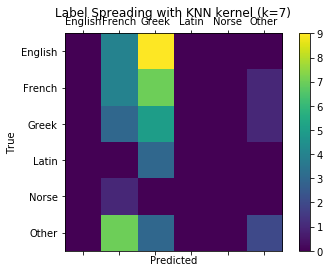

In [26]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score



t_pred = label_prop_model.predict(x_test)

print("Metrics based on 50 hold-out points")

print("Macro")
print("accuracy: %f" % accuracy_score(t_test, t_pred))
print("precision: %f" % precision_score(t_test, t_pred, average='macro'))
print("recall: %f" % recall_score(t_test, t_pred, average='macro'))
print("f1: %f" % f1_score(t_test, t_pred, average='macro'))
print("\n\nMicro")
print("accuracy: %f" % accuracy_score(t_test, t_pred))
print("precision: %f" % precision_score(t_test, t_pred, average='micro'))
print("recall: %f" % recall_score(t_test, t_pred, average='micro'))
print("f1: %f" % f1_score(t_test, t_pred, average='micro'))

from sklearn import metrics
import matplotlib.pyplot as pl

labels = ["English", "French", "Greek", "Latin","Norse", "Other"]
labels_digits = [0, 1, 2, 3, 4, 5]
cm = metrics.confusion_matrix(t_test, t_pred, labels_digits)

fig = pl.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
pl.title("Label Spreading with KNN kernel (k=7)")
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')

pl.show()

# PCA: Let's see what it looks like

Performing PCA

In [11]:
supervised_vectors


<350x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 9602 stored elements in Compressed Sparse Row format>

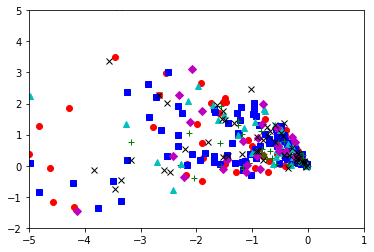

In [13]:
import matplotlib.pyplot as pl

u, s, v = np.linalg.svd(supervised_vectors.toarray())
pca = np.dot(u[:,0:2], np.diag(s[0:2]))



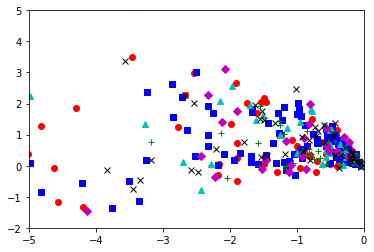

In [15]:
english = np.empty((0,2))
french = np.empty((0,2))
greek = np.empty((0,2))
latin = np.empty((0,2))
norse = np.empty((0,2))
other = np.empty((0,2))

for i in range(pca.shape[0]):
    if targets[0].iloc[i] == "English":
        english = np.vstack((english, pca[i]))
    elif targets[0].iloc[i] == "French":
        french = np.vstack((french, pca[i]))
    elif targets[0].iloc[i] == "Greek":
        greek = np.vstack((greek, pca[i]))
    elif targets[0].iloc[i] == "Latin":
        latin = np.vstack((latin, pca[i]))
    elif targets[0].iloc[i] == "Norse":
        norse = np.vstack((norse, pca[i]))
    elif targets[0].iloc[i] == "Other":
        other = np.vstack((other, pca[i]))
        
pl.plot( english[:,0], english[:,1], "ro", 
          french[:,0],  french[:,1], "bs",
           greek[:,0],   greek[:,1], "g+",
           latin[:,0],   latin[:,1], "c^",
           norse[:,0],   norse[:,1], "mD",
           other[:,0],   other[:,1], "kx")
pl.axis([-5,0,-2, 5])
pl.show()

In [17]:
print (s)

[  5.91620224e+01   2.71903266e+01   2.25373321e+01   2.18548378e+01
   2.05293711e+01   2.02552813e+01   1.90754512e+01   1.85991696e+01
   1.81873986e+01   1.80134132e+01   1.72471862e+01   1.68548772e+01
   1.65085407e+01   1.62650006e+01   1.57953228e+01   1.54611529e+01
   1.50303486e+01   1.48647240e+01   1.42207480e+01   1.40830743e+01
   1.38100719e+01   1.36810377e+01   1.34711118e+01   1.29794841e+01
   1.29328253e+01   1.26212845e+01   1.25284216e+01   1.22711388e+01
   1.22234562e+01   1.20992262e+01   1.19344953e+01   1.18256517e+01
   1.16621712e+01   1.15169454e+01   1.11559128e+01   1.11172564e+01
   1.09965146e+01   1.07834035e+01   1.06354416e+01   1.05598111e+01
   1.05040540e+01   1.03044157e+01   1.00384970e+01   9.95060504e+00
   9.80957830e+00   9.62082994e+00   9.59783806e+00   9.55042494e+00
   9.40766998e+00   9.27471794e+00   9.12442460e+00   9.00725264e+00
   8.94174012e+00   8.89634153e+00   8.86327938e+00   8.73631683e+00
   8.63344898e+00   8.56110426e+00